In [1]:
import string
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score

In [2]:
TEST_DATA = './data/test'

In [3]:
from subprocess import Popen, PIPE, STDOUT
from IPython.core.magic import register_line_magic

@register_line_magic
def runshell(command):
    with Popen(
        command, stdout=PIPE, shell=True, stderr=STDOUT, bufsize=1, close_fds=True
    ) as process:
        for line in iter(process.stdout.readline, b""):
            print(line.decode("utf-8"), end='')

In [4]:
def read_labels(rootdir):
    with open(rootdir + '/labels.txt') as fh_true, \
        open(rootdir + '/labels_pred.csv') as fh_pred:
        labels_true = fh_true.read().splitlines()
        labels_pred_prob = fh_pred.read().splitlines()
        labels_pred = []
        labels_prob = []
        for x in labels_pred_prob:
            tmp = x.split(',')
            labels_pred.append(tmp[0])
            labels_prob.append(float(tmp[1]))
        print('No of Test Rows: %d' % len(labels_true))
    return labels_true, labels_pred, labels_prob

In [5]:
def do_metrics(ss, labels_true, labels_pred, labels_prob):
    print('metrics for ' + ss)
    
    # Confusion Matrix and Classification Report
    cm = confusion_matrix(labels_true, labels_pred)
    f, ax=plt.subplots(figsize=(5,5))
    sns.heatmap(cm, annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
    plt.xlabel("Actuals")
    plt.ylabel("Predictions")
    print(classification_report(labels_true, labels_pred))
    
    # FP FN Percentage
    tp, fn, fp, tn = cm.ravel()
    fp_percent = (fp / (fp + tn)) * 100
    fn_percent = (fn / (fn + tp)) * 100
    print(f"False Positives (FP%): {fp_percent:.2f}%")
    print(f"False Negatives (FN%): {fn_percent:.2f}%")
    
    labels_true_int = np.array(labels_true, dtype=int)
    
    # Receiver Operating Characteristic curve and Area under it
    fpr, tpr, _ = roc_curve(labels_true_int, labels_prob)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend(loc="lower right")
    plt.show()
    
    # Precision Recall Curve and Area Under it
    precision, recall, _ = precision_recall_curve(labels_true_int, labels_prob)
    average_precision = average_precision_score(labels_true_int, labels_prob)
    plt.figure()
    plt.step(recall, precision, color='b', alpha=0.2, where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
    plt.text(0.5, 0.05, 'Area Under PR Curve: %0.2f' % average_precision, ha='center')
    plt.show()
    
    # Saving Tally CSV files
    df = pd.read_csv(TEST_DATA + '/data_test.csv')
    df_pred = pd.read_csv(TEST_DATA + '/labels_pred.csv', header=None)
    df_pred.columns = ['predlabel', 'predprob']
    df = pd.concat([df, df_pred], axis=1)
    df.to_csv(TEST_DATA + '/data_test_' + ss + '.csv', index=False)
    

c:\users\rajas.chavadekar\appdata\local\programs\python\python39\lib\subprocess.py:941: RuntimeWarning: line buffering (buffering=1) isn't supported in binary mode, the default buffer size will be used
  self.stdout = io.open(c2pread, 'rb', bufsize)


Predicting
Model Loaded
Average Time per Text = 0.0438109 ms
Average Length of Text (chars) = 70.0509
Done
No of Test Rows: 4909
metrics for CounterVectorizer + NaiveBayesClassifier
              precision    recall  f1-score   support

           0       0.85      0.83      0.84      2347
           1       0.85      0.86      0.85      2562

    accuracy                           0.85      4909
   macro avg       0.85      0.85      0.85      4909
weighted avg       0.85      0.85      0.85      4909

False Positives (FP%): 13.93%
False Negatives (FN%): 16.70%


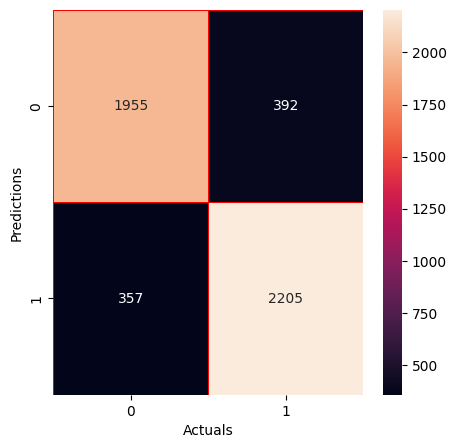

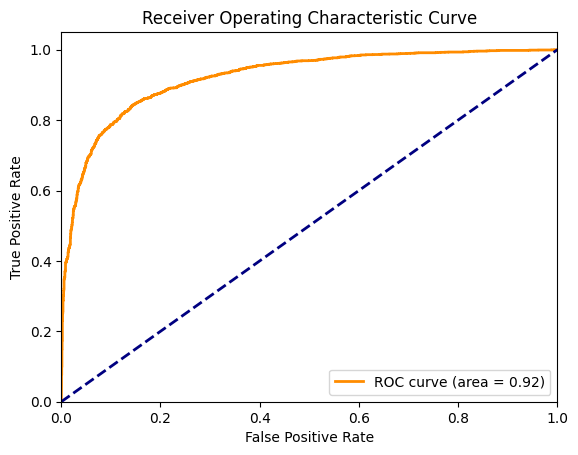

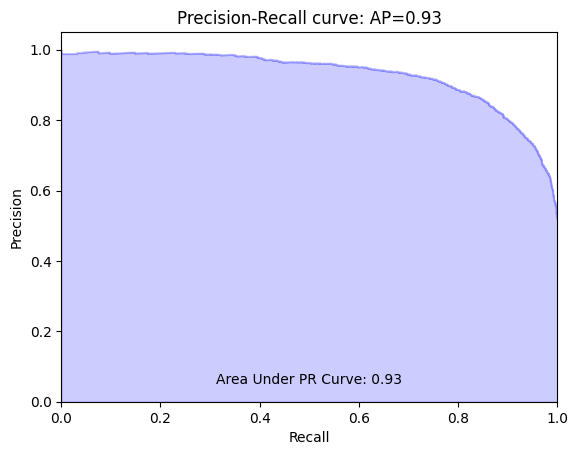

CPU times: total: 578 ms
Wall time: 895 ms


In [6]:
%%time

%runshell mltextclassifier.exe p 1 1 model\model_CounterVectorizer_NaiveBayesClassifier.bin data\test\features.txt data\test\labels_pred.csv

ss='CounterVectorizer + NaiveBayesClassifier'
do_metrics(ss, *read_labels(TEST_DATA))

Predicting
Model Loaded


c:\users\rajas.chavadekar\appdata\local\programs\python\python39\lib\subprocess.py:941: RuntimeWarning: line buffering (buffering=1) isn't supported in binary mode, the default buffer size will be used
  self.stdout = io.open(c2pread, 'rb', bufsize)


Average Time per Text = 0.0578346 ms
Average Length of Text (chars) = 70.0509
Done
No of Test Rows: 4909
metrics for TfidfVectorizer + NaiveBayesClassifier
              precision    recall  f1-score   support

           0       0.78      0.78      0.78      2347
           1       0.80      0.80      0.80      2562

    accuracy                           0.79      4909
   macro avg       0.79      0.79      0.79      4909
weighted avg       0.79      0.79      0.79      4909

False Positives (FP%): 20.22%
False Negatives (FN%): 21.90%


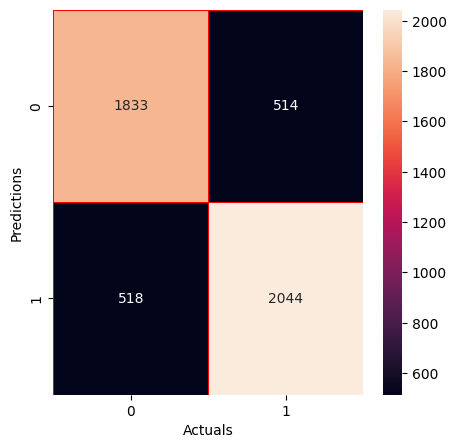

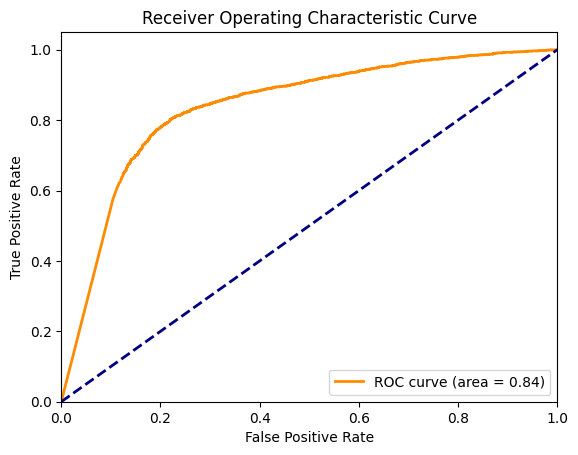

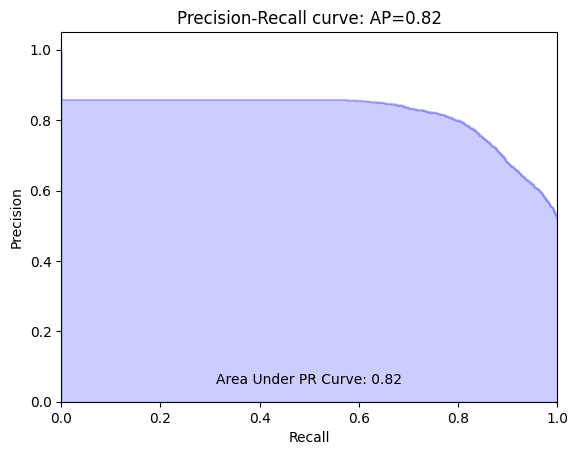

CPU times: total: 688 ms
Wall time: 1.15 s


In [7]:
%%time

%runshell mltextclassifier.exe p 2 1 model\model_TfidfVectorizer_NaiveBayesClassifier.bin data\test\features.txt data\test\labels_pred.csv

ss = 'TfidfVectorizer + NaiveBayesClassifier'
do_metrics(ss, *read_labels(TEST_DATA))

Predicting
Model Loaded


c:\users\rajas.chavadekar\appdata\local\programs\python\python39\lib\subprocess.py:941: RuntimeWarning: line buffering (buffering=1) isn't supported in binary mode, the default buffer size will be used
  self.stdout = io.open(c2pread, 'rb', bufsize)


Average Time per Text = 0.0567822 ms
Average Length of Text (chars) = 70.0509
Done
No of Test Rows: 4909
metrics for CounterVectorizer + LogisticRegressionClassifier
              precision    recall  f1-score   support

           0       0.75      0.88      0.81      2347
           1       0.87      0.73      0.79      2562

    accuracy                           0.80      4909
   macro avg       0.81      0.81      0.80      4909
weighted avg       0.81      0.80      0.80      4909

False Positives (FP%): 27.28%
False Negatives (FN%): 11.59%


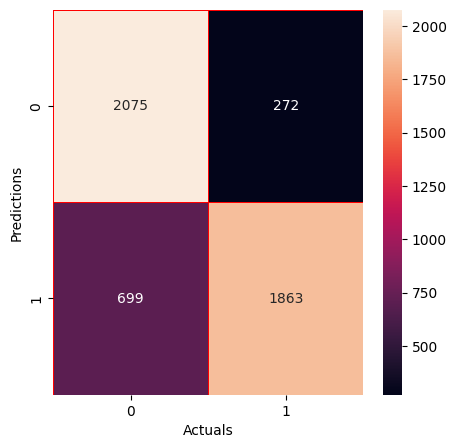

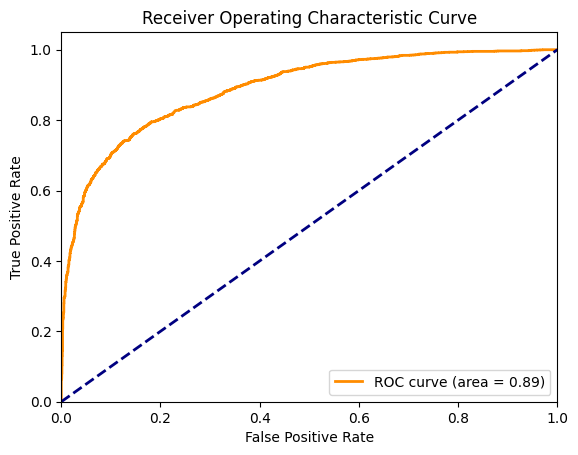

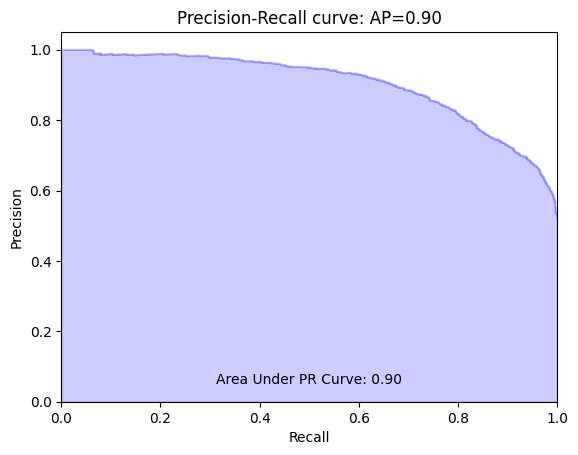

CPU times: total: 562 ms
Wall time: 937 ms


In [8]:
%%time

%runshell mltextclassifier.exe p 1 2 model\model_CounterVectorizer_LogisticRegressionClassifier.bin data\test\features.txt data\test\labels_pred.csv

ss = 'CounterVectorizer + LogisticRegressionClassifier'
do_metrics(ss, *read_labels(TEST_DATA))

Predicting
Model Loaded


c:\users\rajas.chavadekar\appdata\local\programs\python\python39\lib\subprocess.py:941: RuntimeWarning: line buffering (buffering=1) isn't supported in binary mode, the default buffer size will be used
  self.stdout = io.open(c2pread, 'rb', bufsize)


Average Time per Text = 0.0519408 ms
Average Length of Text (chars) = 70.0509
Done
No of Test Rows: 4909
metrics for TfidfVectorizer + LogisticRegressionClassifier
              precision    recall  f1-score   support

           0       0.83      0.87      0.85      2347
           1       0.87      0.84      0.86      2562

    accuracy                           0.85      4909
   macro avg       0.85      0.85      0.85      4909
weighted avg       0.85      0.85      0.85      4909

False Positives (FP%): 15.73%
False Negatives (FN%): 13.46%


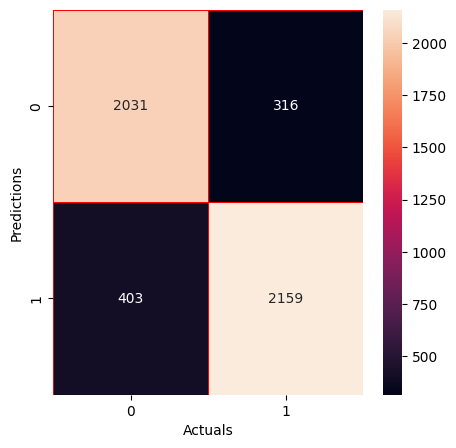

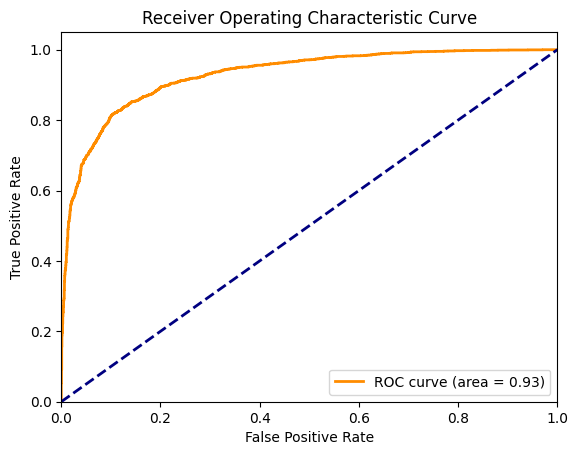

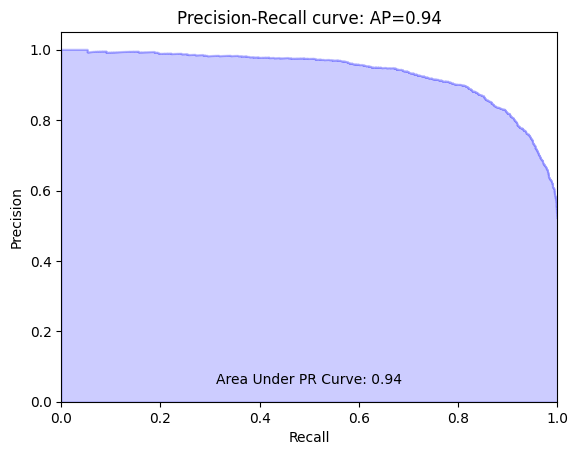

CPU times: total: 531 ms
Wall time: 925 ms


In [9]:
%%time

%runshell mltextclassifier.exe p 2 2 model\model_TfidfVectorizer_LogisticRegressionClassifier.bin data\test\features.txt data\test\labels_pred.csv

ss = 'TfidfVectorizer + LogisticRegressionClassifier'
do_metrics(ss, *read_labels(TEST_DATA))

Predicting
Model Loaded


c:\users\rajas.chavadekar\appdata\local\programs\python\python39\lib\subprocess.py:941: RuntimeWarning: line buffering (buffering=1) isn't supported in binary mode, the default buffer size will be used
  self.stdout = io.open(c2pread, 'rb', bufsize)


Average Time per Text = 0.0545011 ms
Average Length of Text (chars) = 70.0509
Done
No of Test Rows: 4909
metrics for CounterVectorizer + SVCClassifier
              precision    recall  f1-score   support

           0       0.73      0.92      0.82      2347
           1       0.90      0.69      0.79      2562

    accuracy                           0.80      4909
   macro avg       0.82      0.81      0.80      4909
weighted avg       0.82      0.80      0.80      4909

False Positives (FP%): 30.64%
False Negatives (FN%): 8.01%


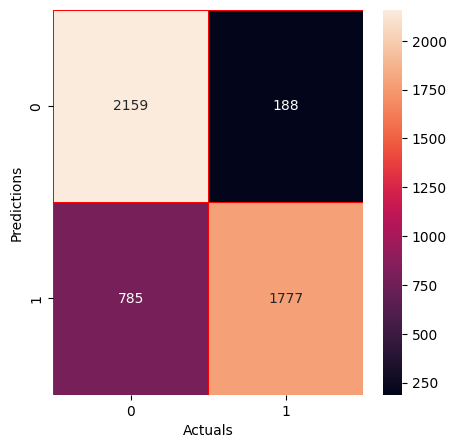

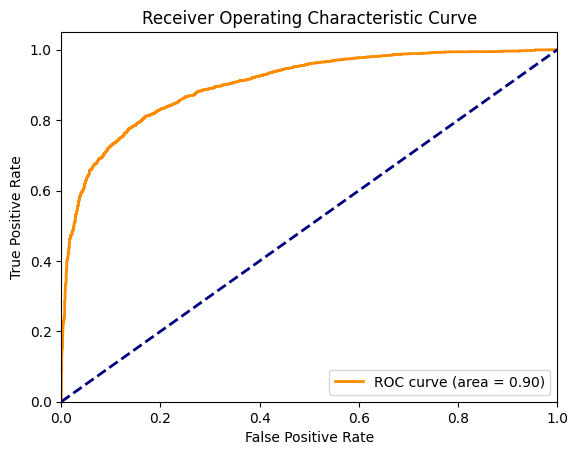

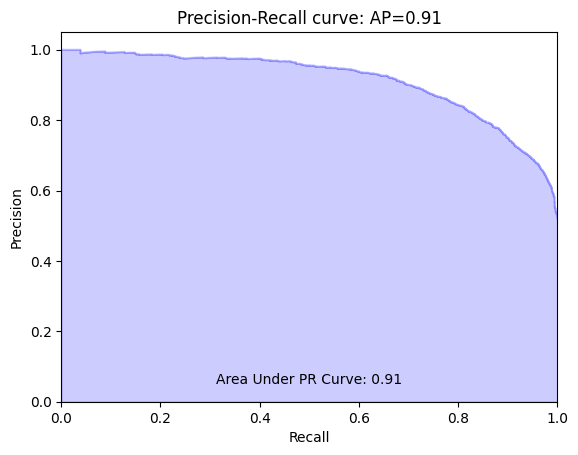

CPU times: total: 625 ms
Wall time: 1.03 s


In [10]:
%%time

%runshell mltextclassifier.exe p 1 3 model\model_CounterVectorizer_SVCClassifier.bin data\test\features.txt data\test\labels_pred.csv

ss = 'CounterVectorizer + SVCClassifier'
do_metrics(ss, *read_labels(TEST_DATA))

Predicting
Model Loaded


c:\users\rajas.chavadekar\appdata\local\programs\python\python39\lib\subprocess.py:941: RuntimeWarning: line buffering (buffering=1) isn't supported in binary mode, the default buffer size will be used
  self.stdout = io.open(c2pread, 'rb', bufsize)


Average Time per Text = 0.0603648 ms
Average Length of Text (chars) = 70.0509
Done
No of Test Rows: 4909
metrics for TfidfVectorizer + SVCClassifier
              precision    recall  f1-score   support

           0       0.81      0.87      0.84      2347
           1       0.87      0.81      0.84      2562

    accuracy                           0.84      4909
   macro avg       0.84      0.84      0.84      4909
weighted avg       0.84      0.84      0.84      4909

False Positives (FP%): 18.89%
False Negatives (FN%): 12.95%


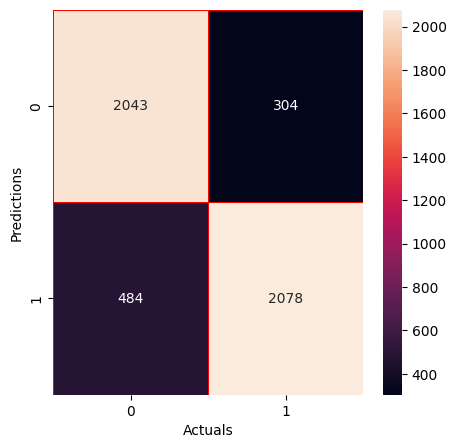

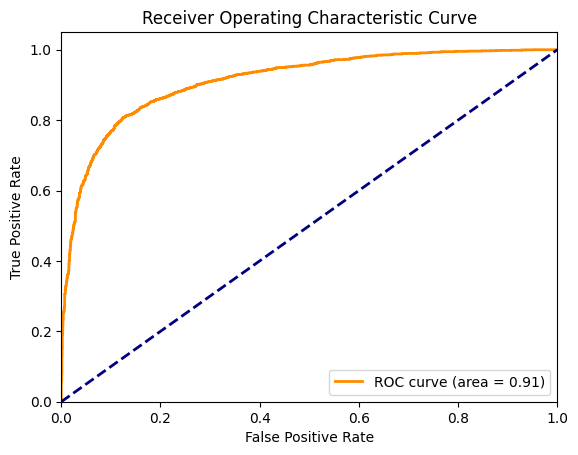

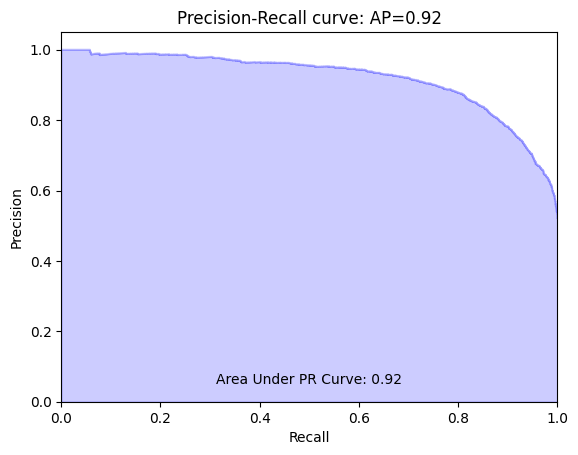

CPU times: total: 469 ms
Wall time: 911 ms


In [11]:
%%time

%runshell mltextclassifier.exe p 2 3 model\model_TfidfVectorizer_SVCClassifier.bin data\test\features.txt data\test\labels_pred.csv

ss = 'TfidfVectorizer + SVCClassifier'
do_metrics(ss, *read_labels(TEST_DATA))

Predicting
Model Loaded


c:\users\rajas.chavadekar\appdata\local\programs\python\python39\lib\subprocess.py:941: RuntimeWarning: line buffering (buffering=1) isn't supported in binary mode, the default buffer size will be used
  self.stdout = io.open(c2pread, 'rb', bufsize)


Average Time per Text = 0.0176289 ms
Average Length of Text (chars) = 70.0509
Done
No of Test Rows: 4909
metrics for CounterVectorizer + RandomForestClassifier
              precision    recall  f1-score   support

           0       0.54      0.76      0.63      2347
           1       0.65      0.40      0.50      2562

    accuracy                           0.57      4909
   macro avg       0.59      0.58      0.56      4909
weighted avg       0.60      0.57      0.56      4909

False Positives (FP%): 59.72%
False Negatives (FN%): 23.95%


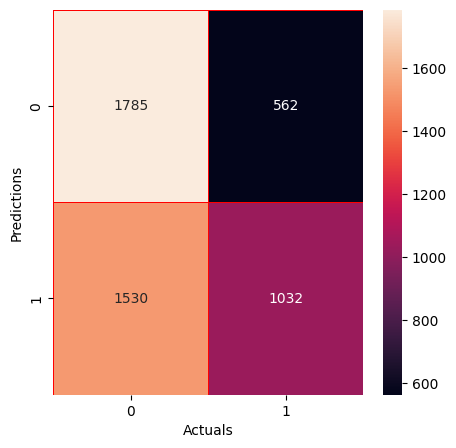

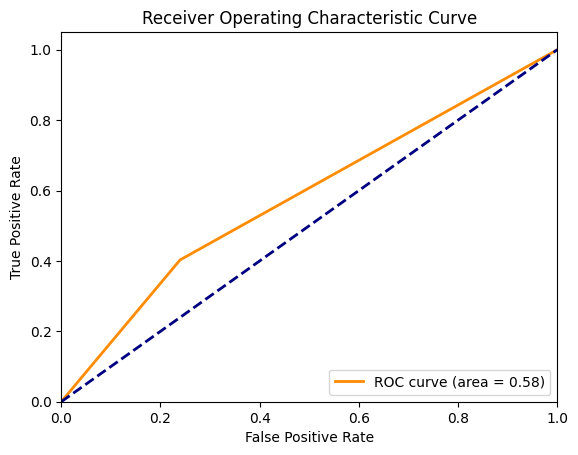

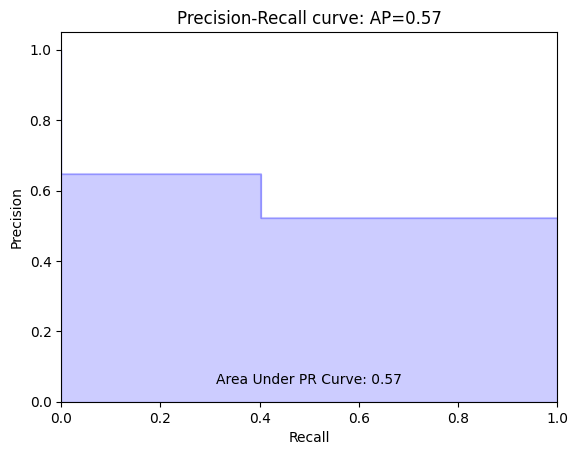

CPU times: total: 469 ms
Wall time: 700 ms


In [12]:
%%time

%runshell mltextclassifier.exe p 1 5 model\model_CounterVectorizer_RandomForestClassifier.bin data\test\features.txt data\test\labels_pred.csv

ss = 'CounterVectorizer + RandomForestClassifier'
do_metrics(ss, *read_labels(TEST_DATA))

Predicting
Model Loaded


c:\users\rajas.chavadekar\appdata\local\programs\python\python39\lib\subprocess.py:941: RuntimeWarning: line buffering (buffering=1) isn't supported in binary mode, the default buffer size will be used
  self.stdout = io.open(c2pread, 'rb', bufsize)


Average Time per Text = 0.018278 ms
Average Length of Text (chars) = 70.0509
Done
No of Test Rows: 4909
metrics for TfidfVectorizer + RandomForestClassifier
              precision    recall  f1-score   support

           0       0.54      0.76      0.63      2347
           1       0.65      0.40      0.50      2562

    accuracy                           0.57      4909
   macro avg       0.59      0.58      0.56      4909
weighted avg       0.60      0.57      0.56      4909

False Positives (FP%): 59.72%
False Negatives (FN%): 23.95%


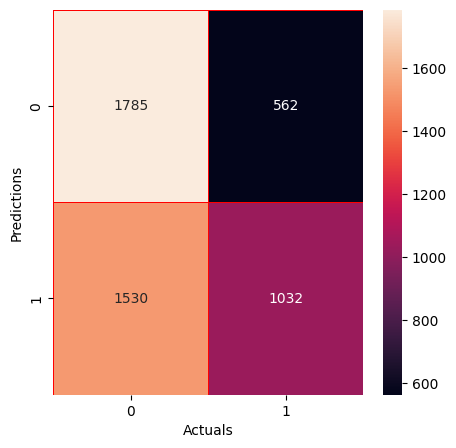

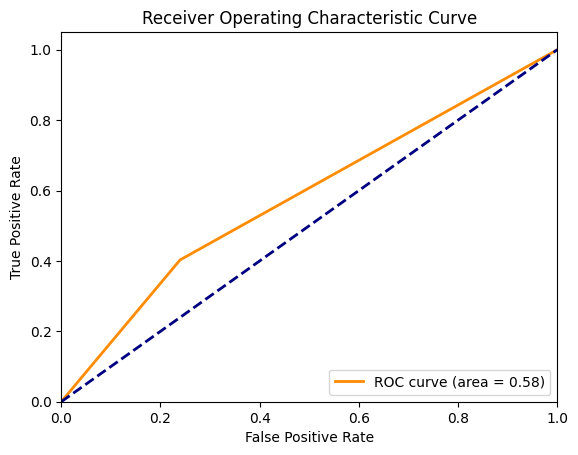

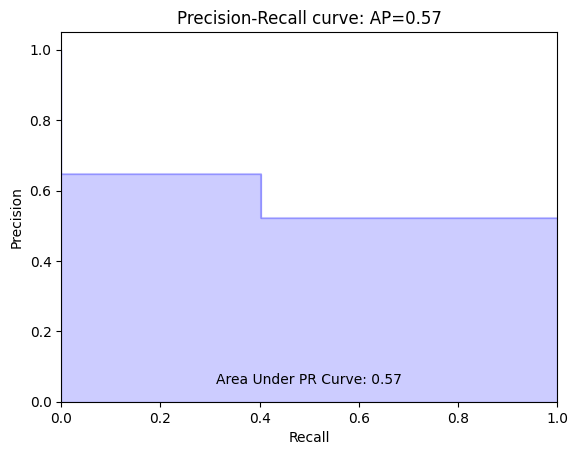

CPU times: total: 594 ms
Wall time: 776 ms


In [13]:
%%time

%runshell mltextclassifier.exe p 2 5 model\model_TfidfVectorizer_RandomForestClassifier.bin data\test\features.txt data\test\labels_pred.csv

ss = 'TfidfVectorizer + RandomForestClassifier'
do_metrics(ss, *read_labels(TEST_DATA))

Predicting
Model Loaded
Average Time per Text = 0.0140347 ms
Average Length of Text (chars) = 70.0509
Done
No of Test Rows: 4909
metrics for CounterVectorizer + GradientBoostingClassifier


c:\users\rajas.chavadekar\appdata\local\programs\python\python39\lib\subprocess.py:941: RuntimeWarning: line buffering (buffering=1) isn't supported in binary mode, the default buffer size will be used
  self.stdout = io.open(c2pread, 'rb', bufsize)


              precision    recall  f1-score   support

           0       0.54      0.76      0.63      2347
           1       0.65      0.40      0.50      2562

    accuracy                           0.57      4909
   macro avg       0.59      0.58      0.56      4909
weighted avg       0.60      0.57      0.56      4909

False Positives (FP%): 59.72%
False Negatives (FN%): 23.95%


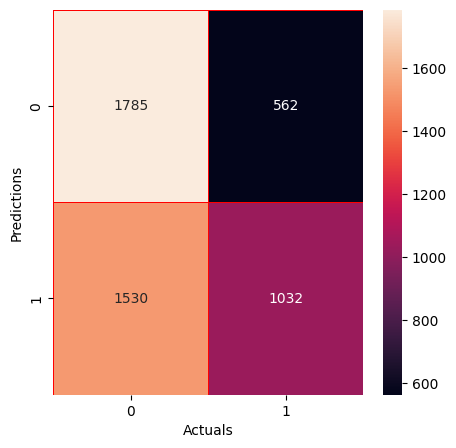

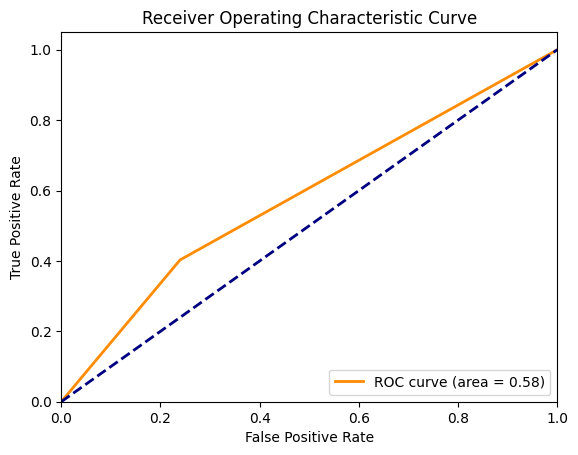

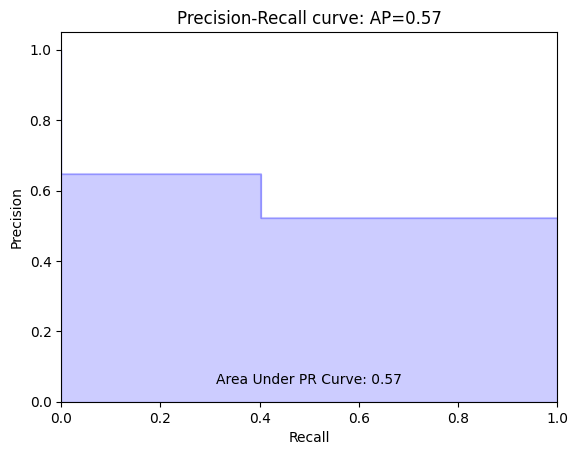

CPU times: total: 469 ms
Wall time: 682 ms


In [14]:
%%time

%runshell mltextclassifier.exe p 1 6 model\model_CounterVectorizer_GradientBoostingClassifier.bin data\test\features.txt data\test\labels_pred.csv

ss = 'CounterVectorizer + GradientBoostingClassifier'
do_metrics(ss, *read_labels(TEST_DATA))

Predicting
Model Loaded
Average Time per Text = 0.0165433 ms
Average Length of Text (chars) = 70.0509


c:\users\rajas.chavadekar\appdata\local\programs\python\python39\lib\subprocess.py:941: RuntimeWarning: line buffering (buffering=1) isn't supported in binary mode, the default buffer size will be used
  self.stdout = io.open(c2pread, 'rb', bufsize)


Done
No of Test Rows: 4909
metrics for TfidfVectorizer + GradientBoostingClassifier
              precision    recall  f1-score   support

           0       0.54      0.76      0.63      2347
           1       0.65      0.40      0.50      2562

    accuracy                           0.57      4909
   macro avg       0.59      0.58      0.56      4909
weighted avg       0.60      0.57      0.56      4909

False Positives (FP%): 59.72%
False Negatives (FN%): 23.95%


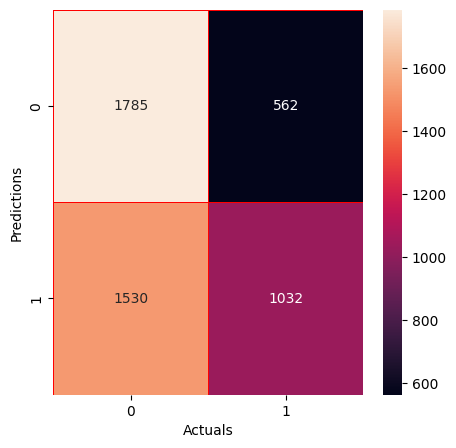

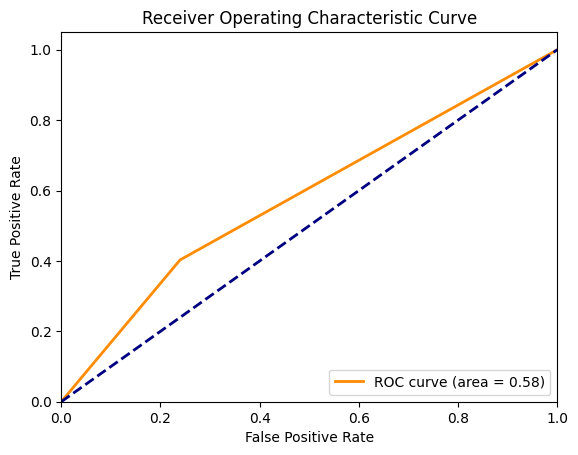

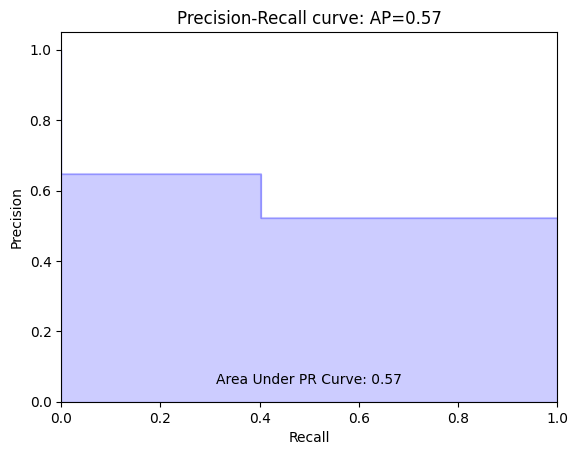

CPU times: total: 531 ms
Wall time: 680 ms


In [15]:
%%time

%runshell mltextclassifier.exe p 2 6 model\model_TfidfVectorizer_GradientBoostingClassifier.bin data\test\features.txt data\test\labels_pred.csv

ss = 'TfidfVectorizer + GradientBoostingClassifier'
do_metrics(ss, *read_labels(TEST_DATA))